# Classification tree

***
The main goal of classification tree to split the target variable into relatively more homogenous subgroups.
***

![alt text](fig1.png)

Let's consider simple tree given in Fig 1. Tree splits flowers firstly according to petal_length ,then petal_width, so in result predictor space(flowers) divides into 3 regions(species) : setosa ,versicolor, virginica. This regions can be written as $R_1$ = {X | petal_length<=2.45}, $R_2$={X | petal_length>2.45 , petal_width<=1.75}, and  $R_3$={X | petal_length>2.45 , petal_width>1.75} and known as **leafs** of the tree. The points along the tree where predictor space is split are referred as **internal nodes**(in Fig 1, two internal nodes are indicated by the text petal_length $<=$ 2.45 and petal_width $<=$ 1.75) and segments that connect the nodes are branches. **Depth of tree** is the total number of branches from the top of the tree to the leaf node in the longest path.

So let's consider construction of classification tree in more details

In [70]:
from jupyterquiz import display_quiz
import json
from base64 import b64decode
import re

encoded_quiz1 = '<span style="display:none" id="example">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBhIGxlYWYgbm9kZSBpbiBhIGNsYXNzaWZpY2F0aW9uIHRyZWU/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJjb2RlIjogIlRoZSB0b3Btb3N0IG5vZGUiLCAiY29ycmVjdCI6IGZhbHNlfSwgeyJjb2RlIjogIkEgbm9kZSB3aXRoIG5vIGNoaWxkcmVuIiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIlRoZSBub2RlIHdpdGggdGhlIGhpZ2hlc3QgR2luaSBpbXB1cml0eSIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiQSBub2RlIHdpdGggdGhlIGxvd2VzdCBpbmZvcm1hdGlvbiBnYWluIiwgImNvcnJlY3QiOiBmYWxzZX1dfV0=</span>'
encoded_quiz2 = '<span style="display:none" id="example1">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBHaW5pIGltcHVyaXR5IHVzZWQgZm9yIGluIHRoZSBjb250ZXh0IG9mIGNsYXNzaWZpY2F0aW9uIHRyZWVzPyIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siY29kZSI6ICJUbyBtZWFzdXJlIHRoZSBhdmVyYWdlIHNxdWFyZWQgZGlmZmVyZW5jZSBiZXR3ZWVuIHByZWRpY3RlZCBhbmQgYWN0dWFsIHZhbHVlcyIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiVG8gbWVhc3VyZSB0aGUgaW1wdXJpdHkgb2YgYSBzZXQgb2YgbGFiZWxzIiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIlRvIGNhbGN1bGF0ZSB0aGUgZW50cm9weSBvZiBhIGRhdGFzZXQiLCAiY29ycmVjdCI6IGZhbHNlfSwgeyJjb2RlIjogIlRvIGRldGVybWluZSB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzIGluIGEgZGF0YXNldCIsICJjb3JyZWN0IjogZmFsc2V9XX1d</span>'
encoded_quiz3 = '<span style="display:none" id="q_demo_seq">W3sicXVlc3Rpb24iOiAiSWYgYSBkZWNpc2lvbiB0cmVlIGhhcyBhIHRvdGFsIG9mIDUgbGVhZiBub2RlcyBhbmQgZWFjaCBsZWFmIG5vZGUgY29ycmVzcG9uZHMgdG8gYSB1bmlxdWUgY2xhc3MsIHdoYXQgaXMgdGhlIG1heGltdW0gbnVtYmVyIG9mIGNsYXNzZXMgdGhlIHRyZWUgY2FuIHByZWRpY3Q/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDUsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlRoZSBtYXhpbXVtIG51bWJlciBvZiBjbGFzc2VzIGEgdHJlZSB3aXRoIG4gbGVhZiBub2RlcyBjYW4gcHJlZGljdCBpcyBuLiBUaGVyZWZvcmUsIHRoZSBhbnN3ZXIgaXMgNS4ifSwgeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogNCwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBxdWlldCBsaWtlIHRoYXQgdHJ5IGFnYWluISJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiA2LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTm90IHF1aWV0IGxpa2UgdGhhdCB0cnkgYWdhaW4hIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIk5vIFdheSEgVHJ5IGFnYWluISJ9XX1d</span>'
encoded_quiz4 = '<span style="display:none" id="q_demo_seq1">W3sicXVlc3Rpb24iOiAiRm9yIGEgZmFpciBjb2luICh3aXRoIHR3byBlcXVhbGx5IGxpa2VseSBvdXRjb21lcywgaGVhZHMgYW5kIHRhaWxzKSwgY2FsY3VsYXRlIHRoZSBlbnRyb3B5LiIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAxLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJJbiBhIGJpbmFyeSB0cmVlLCB0aGUgbWF4aW11bSBkZXB0aCBpcyB0aGUgbnVtYmVyIG9mIGxldmVscywgd2hpY2ggaXMgbG9nMihOdW1iZXIgb2YgTGVhZiBOb2RlKS4ifSwgeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBxdWlldCBsaWtlIHRoYXQgdHJ5IGFnYWluISJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAwLjUsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJOb3QgcXVpZXQgbGlrZSB0aGF0IHRyeSBhZ2FpbiEifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiTm8gV2F5ISBUcnkgYWdhaW4hIn1dfV0=</span>'
encoded_quiz5 = '<span style="display:none" id="q_e_trillions12">W3sicXVlc3Rpb24iOiAiU3VwcG9zZSB5b3UgaGF2ZSBhIGRhdGFzZXQgd2l0aCA1MDAgc2FtcGxlcyBhbmQgdHdvIGNsYXNzZXMgKDAgYW5kIDEpLiBJZiAzMDAgc2FtcGxlcyBiZWxvbmcgdG8gY2xhc3MgMCBhbmQgMjAwIHNhbXBsZXMgYmVsb25nIHRvIGNsYXNzIDEsIHdoYXQgaXMgdGhlIEdpbmkgaW1wdXJpdHkgb2YgdGhlIGVudGlyZSBkYXRhc2V0PyIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIwLjMyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBlbm91Z2ghIn0sIHsiYW5zd2VyIjogIjAuMjIiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTm90IGVub3VnaCEifSwgeyJhbnN3ZXIiOiAiMC40NCIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlllcCB0aGF0J3MgcmlnaHQifSwgeyJhbnN3ZXIiOiAiMTEwMDAwLzI1MDAwMCIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlllcCB0aGF0J3MgcmlnaHQifV19XQ==</span>'



encoded_quizzes = [encoded_quiz1, encoded_quiz2, encoded_quiz3, encoded_quiz4, encoded_quiz5]

quiz_results = []

for encoded_quiz in encoded_quizzes:
    matches = re.search(r'id="[^"]*">(.*?)</span>', encoded_quiz)
    if matches:
        encrypted_value = matches.group(1)

        decoded_quiz = b64decode(encrypted_value).decode('utf-8')
        quiz_results.append(json.loads(decoded_quiz))

quiz_result1, quiz_result2, quiz_result3, quiz_result4, quiz_result5 = quiz_results

In [71]:
display_quiz(quiz_result1)

<IPython.core.display.Javascript object>

Lets create dataset with 2 classes [0,1] and 20 samples, 3 features , each feature can take values [0,1,2,3,4]

In [72]:
#hide
import warnings
warnings.filterwarnings("ignore")

In [73]:
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

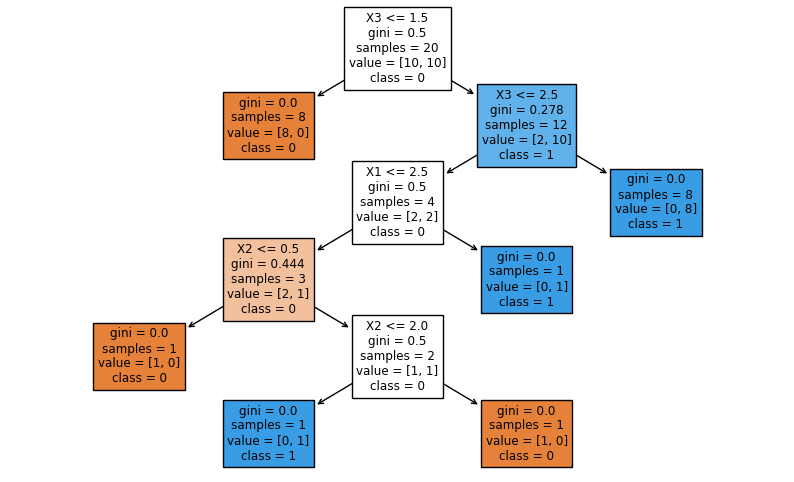

In [74]:
X, Y = datasets.make_classification(
    n_samples=20, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, n_repeated=0, n_classes=2, random_state=11
)

binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
X = binner.fit_transform(X)
data = pd.DataFrame(X, columns=["X"+str(i) for i in [1,2,3]])
data['target'] = Y

# Create and fit the decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X, Y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
from sklearn.tree import plot_tree
plot_tree(dtree, filled=True, feature_names=data.columns[:-1].tolist(), class_names=['0', '1'])
plt.show()

## Greedy top down approach 

Greedy top down approach or recursive binary splitting begins at the top of the tree and then succesfully splits the predictor space ; each split indicated via two new branches futher down on the tree. It is greedy because at each step of the tree building process, the best split made at that particular step, rather than looking ahead and picking a split that make tree better in some future steps.

In order to perform recursive binary splitting tree evaluates all variables on some statistical criteria and then chooses  the variables that performs best on the criteria. Variable selection criterions:
 * gini index 
 * entropy 
 
Variables with smallest gini index or entropy will be selected

### Gini index

The Gini index is defined by:
    $$ G = \sum_{k=1}^{n} p_{k} (1-p_{k}). $$
    
where $p_{k}$ represents the proportion of training observation that are from kth class at some node V:
    $$ p_k={1 \over n} \sum_{(x_i,y_i) \in V} I[y_i=k] $$
    
It is easy to see that Gini index takes small values if all $p_k$'s are close to 0 or 1.Because of this Gini index referred as a measure of node purity-a small value that indicates that a node contains predominantly observations from a single class. 

In [75]:
display_quiz(quiz_result5)

<IPython.core.display.Javascript object>

some small code, which helps to calculate gini for one features to diffrent cutpoints

In [76]:
for k in range(1,5):
    # calculations of gini for feature<k
    gini=0
    gini_c=1
    g0=0
    g1=0
    l1=0
    for i in range(0,k):
        index=data[data['X3']==i].index.values  #find indexes where feature equal i 
        
        if len(index)>0:
          g0=g0+data['target'][index][data['target'][index]==0].count() #count how many 0's in this subset
          g1=g1+data['target'][index][data['target'][index]==1].count() #count how many 1's in this subset
        l1=l1+len(index)
    if l1!=0:    
      gini_c=1-(g0/l1)**2-(g1/l1)**2 #calculate gini by formula
      gini=gini+l1*gini_c/data['target'].count() #start calculation for overall gini  
    
    # calculations of gini for feature>=k(same process)
    gini_c=1
    g0=0
    g1=0
    l1=0
    for i in range(k,5):
        index=data[data['X3']==i].index.values
        
        if len(index)>0:
          g0=g0+data['target'][index][data['target'][index]==0].count()
          g1=g1+data['target'][index][data['target'][index]==1].count()
        l1=l1+len(index)
    if l1!=0:    
      gini_c=1-(g0/l1)**2-(g1/l1)**2
      gini=gini+l1*gini_c/data['target'].count() #overall gini is ready
    print('for X3<'+str(k)+' Gini Index='+str(gini))

for X3<1 Gini Index=0.375
for X3<2 Gini Index=0.1666666666666666
for X3<3 Gini Index=0.1666666666666666
for X3<4 Gini Index=0.375


So we obtain next table of Gini indexes

![alt text](fig3.png)

So let's spit data by X3<=1

In [77]:
data_left = data[data['X3']<2]
data_left

,X1,X2,X3,target
2,2.0,4.0,0.0,0
3,4.0,4.0,1.0,0
5,0.0,0.0,0.0,0
9,4.0,4.0,1.0,0
10,1.0,1.0,0.0,0
12,2.0,3.0,1.0,0
14,1.0,2.0,0.0,0
16,0.0,0.0,1.0,0


we found first pure node! let's see what is on the right side

In [78]:
data_right = data[data['X3']>1]
data_right

,X1,X2,X3,target
0,2.0,2.0,3.0,1
1,0.0,0.0,2.0,0
4,2.0,3.0,2.0,0
6,0.0,1.0,2.0,1
7,3.0,4.0,3.0,1
8,3.0,2.0,3.0,1
11,1.0,1.0,4.0,1
13,4.0,3.0,4.0,1
15,3.0,0.0,3.0,1
17,3.0,2.0,2.0,1


Now we split further the right side 

Next table with Gini Indexes looks like this

![alt text](fig4.png)

let's spit data by X3<=2.So left and right nodes will look like

![alt text](fig5.png)

Continue with the left node

![alt text](fig6.png)

Last split

![alt text](fig7.png)

Our tree is completed it will look like

![alt text](fig8.png)

Let's see how this tree will look like created by DecisionTreeClassifier 

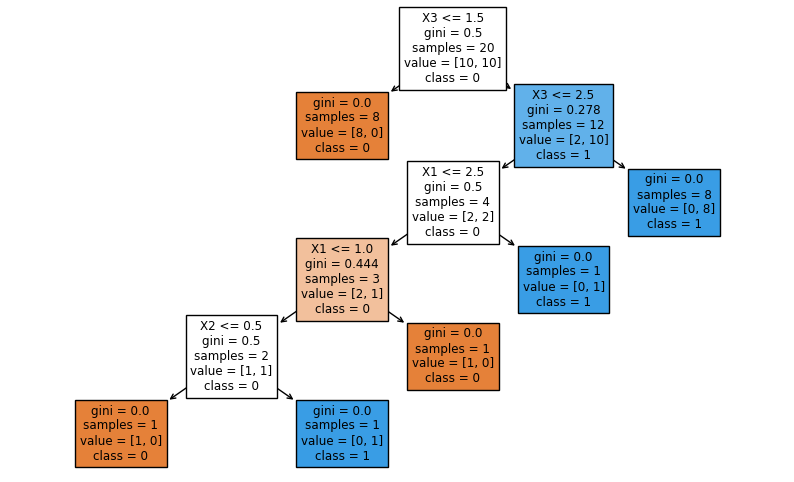

In [79]:
X, Y = datasets.make_classification(
    n_samples=20, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, n_repeated=0, n_classes=2, random_state=11
)

binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
X = binner.fit_transform(X)
data = pd.DataFrame(X, columns=["X"+str(i) for i in [1,2,3]])
data['target'] = Y

dtree = DecisionTreeClassifier()
dtree.fit(X, Y)

plt.figure(figsize=(10, 6))
plot_tree(dtree, filled=True, feature_names=data.columns[:-1].tolist(), class_names=['0', '1'])
plt.show()

### Entropy 

Entropy is a term that comes from physics and means a measure of disorder. In context classification tree it means measure of disprder or impurity in a node. It is defined as:
    $$E=-\sum_{k=1}^{n} p_k \log p_k  $$
Entropy takes small values if all $p_k$'s are close to 0 or 1.

![alt text](fig2.png)

```{admonition}  If feature is continuous how to select cutpoint?
A decision tree selects a cutpoint for a continuous feature by evaluating all possible cutpoints and choosing the one 
that performs best on the criteria.
```

## When tree stops growing?

Tree stops growing when it reaches pure nodes (nodes where all samples belongs to one class). However, usually it leads to overfitting, so it is common practice to set hyperparameters to some value in order to restrict growth. For DecisionTreeClassifier from Sklearn they are:
* max_depth - The maximum depth of the tree
* min_samples_leaf - The minimum number of samples required to be at a leaf node
* min_samples_split - The minimum number of samples required to split an internal node

In [80]:
display_quiz(quiz_result4)

<IPython.core.display.Javascript object>

## Let's see how it works in practise

Work with titanic dataset. Import libraries

In [81]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 

In [82]:
# load dataset titanic
df = sns.load_dataset('titanic')
#dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

From the heatmap which show correlation, select columns that correlates with survived the most(adult_male,pclass,fare), target will be survived column

In [83]:
Y=df['survived']
X=pd.get_dummies(df, columns = ['adult_male'],drop_first=True)[['adult_male_True','pclass','fare']]
X

,adult_male_True,pclass,fare
0,True,3,7.2500
1,False,1,71.2833
2,False,3,7.9250
3,False,1,53.1000
4,True,3,8.0500
...,...,...,...
886,True,2,13.0000
887,False,1,30.0000
888,False,3,23.4500
889,True,1,30.0000


train-test split and train model 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [85]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Results!

In [86]:
print("Train Accuracy :", accuracy_score(y_train, dtree.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dtree.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dtree.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test,dtree.predict(X_test)))

Train Accuracy : 0.9191616766467066
Train Confusion Matrix:
[[395  12]
 [ 42 219]]
--------------------------------------------------
Test Accuracy : 0.852017937219731
Test Confusion Matrix:
[[122  20]
 [ 13  68]]


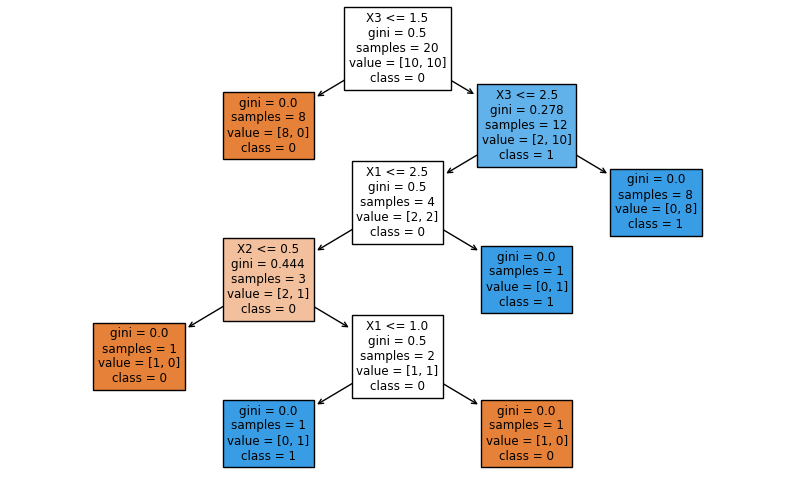

In [87]:
X, Y = datasets.make_classification(
    n_samples=20, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, n_repeated=0, n_classes=2, random_state=11
)

binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
X = binner.fit_transform(X)
data = pd.DataFrame(X, columns=["X"+str(i) for i in [1,2,3]])
data['target'] = Y

dtree = DecisionTreeClassifier()
dtree.fit(X, Y)

plt.figure(figsize=(10, 6))
plot_tree(dtree, filled=True, feature_names=data.columns[:-1].tolist(), class_names=['0', '1'])
plt.show()


And for predicted variables based on max_depth values you can see different ROC curve vizualization:

In [88]:
display_quiz(quiz_result3)

<IPython.core.display.Javascript object>

In [89]:
lst=[]
for max_depth in range (2,20,1):
    dtree=DecisionTreeClassifier(max_depth=max_depth)
    dtree.fit(X_test,y_test)
    lst.append(dtree.predict(X_test))

In [90]:
import plotly.graph_objects as go
from sklearn import metrics
import numpy as np
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Create figure
fig = go.Figure(layout_yaxis_range=[0,1], layout_xaxis_range=[0,1],)


# Add traces, one for each slider step
for step in np.arange(2,18,1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="ROC curve",
            #x=np.array(x_lst[step]),
            #y=np.array(list(dict_depth.values())[int(step)])
            x = metrics.roc_curve(y_test,lst[step])[0],
            y = metrics.roc_curve(y_test,lst[step])[1]
            
            #x=np.array(X_test),
            #y=np.array(list(dict_depth.values()))
        )
    )

fig.data[15].visible = True



# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": 'ROC curve, max_depth = ' + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Max_depth value: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    width=700, height=600,
    xaxis_title="False Positive Rate", yaxis_title="True Positive Rate",
    title={
        'text': "ROC curve",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    
)

In [91]:
import plotly
plotly.offline.plot(fig, filename='plt.html', auto_open=False)

'plt.html'

In [92]:
from IPython.display import IFrame
IFrame(src='./plt.html', width=1000, height=600)